# Εργασία εξαμήνου ανάκτηση πληροφορίας
Παρακάτω βρίσκονται εκτελεσμένα τα επιμέρους βήματα του κώδικα με κάποια ενδεικτικά τρεξίματα

# Τμήμα υλοποίησης web crawler (Βήμα 1)
Ακολουθεί το τμήμα κώδικα που εκτελεί με επιτυχία το βήμα 1 της εργασίας. Συγκεκριμένα με χρήση BeautifulSoup λαμβάνει τα περιεχόμενα από τα response των τεσσάρων επιλεγμένων άρθρων του wikipedia που δεχτήκαμε προηγουμένως τα οργανώνει σε λίστα ώστε τελικα να γίνει μετατροπή της σε DataFrame για την διευκόλυνση πραγματοποίησης των βημάτων που ακολουθούν.

In [2]:
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd

pages = ["World_Wide_Web", "Web_Development", "Search_Engines", "Social_Media"]# Λίστα με τα ονόματα των άρθρων που θα λάβουμε τις πληροφορίες παρακάτω

data = []# Αρχικοποίηση λίστας για την αποθήκευση των δεδομένων

#υλοποίηση web crawler
for page_id, page in enumerate(pages):  #Αντί για enumerate(pages), ξεκινάμε από το 0
 url = f"https://en.wikipedia.org/wiki/{page}"
 try:
  response = requests.get(url)#Αποστολή αιτήματος στην ιστοσελίδα
  response.raise_for_status()
  soup = BeautifulSoup(response.text, 'html.parser')#εφαρμογή BeautifulSoup στο κείμενο που λάβαμε

  paragraphs = soup.find_all('p')#Εξαγωγή παραγράφων από το html
  parsed_paragraphs = [p.text.strip() for p in paragraphs if p.text.strip()]

  for paragraph in parsed_paragraphs:
   data.append({'Selida': page, 'Selida_ID': page_id, 'Paragraphos': paragraph})#Προσθήκη δεδομένων στη λίστα data
    
 except requests.RequestException as e:
  print(f"Error sthn ektelesh tou etoimatos {url}: {e}")#exception για την περίπτωση που δεν λάβουμε απάντηση στο αίτημα
        
df = pd.DataFrame(data)# Δημιουργία DataFrame
print(df)

             Selida  Selida_ID  \
0    World_Wide_Web          0   
1    World_Wide_Web          0   
2    World_Wide_Web          0   
3    World_Wide_Web          0   
4    World_Wide_Web          0   
..              ...        ...   
366    Social_Media          3   
367    Social_Media          3   
368    Social_Media          3   
369    Social_Media          3   
370    Social_Media          3   

                                           Paragraphos  
0    The World Wide Web (WWW or simply the Web) is ...  
1    The Web was invented by English computer scien...  
2    The original and still very common document ty...  
3    The Web has become the world's dominant inform...  
4    The Web was invented by English computer scien...  
..                                                 ...  
366  Deplatforming, also called no-platforming, is ...  
367  A number of commentators and experts have argu...  
368  According to LikeWar: The Weaponization of Soc...  
369  Social media con

# Προεπεξεργασία κειμένου (Βήμα 2)
Η συνέχεια στο βήμα 2 αφορά την προεπεξεργασία του κειμένου που προέκυψε ως αποτέλεσμα του πρώτου βήματος. Γίνεται αφαίρεση των λεγόμενων stopwords και των σημείων στίξης, μετατροπή των Κεφαλαίων γραμμάτων σε πεζά και tokenization των λέξεων μέσω του υποπρογράμματος, αυτό εκτελείται για το τμήμα Paragraphos του DataFrame μας και αφού πλέον έχει "καθαριστεί" αυτό το τμήμα, δημιουργείτε μια λίστα με τις λέξεις του.Με χρήση της FreqDist δημιουργείται αντικείμενο με την συχνότητα των λέξεων και ακολουθεί η εμφάνιση των 50 πιο χρησιμοποιημένων λέξεων στην κονσόλα και σε γραφική παράσταση καθώς και εμφάνιση του "καθαρού" πλέον DataFrame ξανά στην κονσόλα.  

Top 50 Most Common Tokens:
[('web', 380), ('social', 277), ('media', 271), ('search', 201), ('content', 117), ('use', 101), ('information', 98), ('users', 88), ('page', 84), ('user', 84), ('engine', 81), ('internet', 78), ('may', 74), ('pages', 71), ('used', 62), ('engines', 58), ('platforms', 58), ('also', 57), ('server', 56), ('people', 56), ('websites', 54), ('data', 54), ('one', 53), ('many', 50), ('reported', 46), ('browser', 45), ('development', 45), ('world', 41), ('website', 41), ('online', 41), ('system', 40), ('access', 38), ('using', 38), ('sites', 36), ('http', 35), ('site', 35), ('google', 35), ('results', 35), ('html', 34), ('first', 33), ('time', 33), ('news', 33), ('wide', 32), ('software', 29), ('like', 29), ('public', 27), ('called', 27), ('application', 27), ('resources', 25), ('computer', 25)]


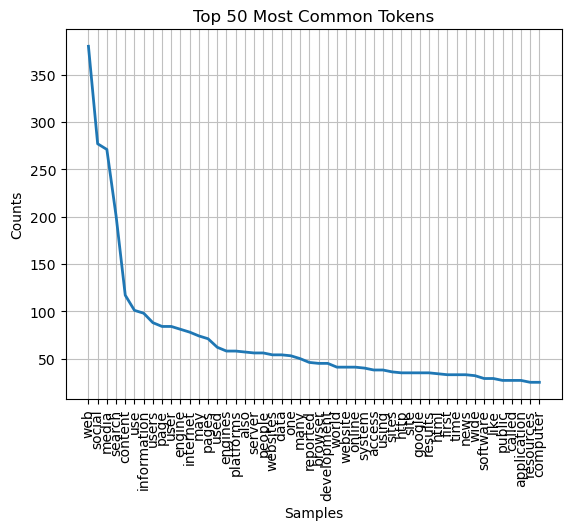

             Selida  Selida_ID  \
0    World_Wide_Web          0   
1    World_Wide_Web          0   
2    World_Wide_Web          0   
3    World_Wide_Web          0   
4    World_Wide_Web          0   
..              ...        ...   
366    Social_Media          3   
367    Social_Media          3   
368    Social_Media          3   
369    Social_Media          3   
370    Social_Media          3   

                                           Paragraphos  
0    [world, wide, web, www, simply, web, informati...  
1    [web, invented, english, computer, scientist, ...  
2    [original, still, common, document, type, web,...  
3    [web, become, world, dominant, information, sy...  
4    [web, invented, english, computer, scientist, ...  
..                                                 ...  
366  [deplatforming, also, called, form, internet, ...  
367  [number, commentators, experts, argued, social...  
368  [according, likewar, weaponization, social, me...  
369  [social, media, 

In [4]:
import tkinter as tk
from tkinter import ttk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import defaultdict
import pandas as pd
import numpy as np

# Προετοιμασία stopwords και σημεία στίξης
stop_words = set(stopwords.words('english'))
punctuation_table = str.maketrans('', '', string.punctuation)

def clean_and_tokenize(text):
 tokens = word_tokenize(text.lower())#Μετατροπή των γραμμάτων σε πεζά και ταυτόχρονο tokenization
 cleaned_tokens = [token.translate(punctuation_table) for token in tokens if token not in stop_words and token.isalnum()]#αφαίρεση "stop_words" και σημείων στίξης"
 return cleaned_tokens

df['Paragraphos'] = df['Paragraphos'].apply(clean_and_tokenize)#κλήση του υποπρογράμματος για προεπεξεργασία του κειμένου

all_tokens = [token for tokens in df['Paragraphos'] for token in tokens]#Δημιουργία λίστα με όλες τις λέξεις από την στήλη Paragraphos
fdist1 = FreqDist(all_tokens)#Δημιουργία αντικειμένου που περιέχει την συχνότητα εμφάνισης λέξεων στα άρθρα
print("Top 50 Most Common Tokens:")
print(fdist1.most_common(50))#Εμφάνιση των 50 συχνότερων λέξεων στην κονσόλα
fdist1.plot(50, title='Top 50 Most Common Tokens')#Εμφάνιση γραφικής παράστασης με τις 50 συχνότερες λέξεις

df.to_csv('ApotelesmataXarakthrwn.csv', index=False, encoding='utf-8')#αποθήκευση του "καθαρισμένου" DataFrame σε αρχείο CSV
print(df)

# Ευρετήριο-Indexing (Βήμα 3)
Δημιουργείται ένα Set μέσω της defaultdict το οποίο θα αποτελέσει το ευρετήριο μας με μοναδικές εγγραφές(ακριβώς επειδή πρόκειται για set).
Παρακάτω ξεκινάει μια for η οποία επιστρέφει κάθε γραμμή του dataframe, εντός της κρατάμε τον αριθμό σελίδας(Αρθρού) στο οποίο βρισκόμαστε, ανοίγουμε μια 2η for η οποία για κάθε λέξη πραγματοποιεί μια εγγραφή στο ευρετήριο που περιέχει την λέξη και τον ID του άρθρου της, αλλιώς στην περίπτωση που η λέξη αυτή υπάρχει ήδη προσθέτει το ID του άρθρου στο Set μαζί με τα υπόλοιπα στα οποία η λέξη υπάρχει ήδη. Ακολουθεί η μετατροπή του set σε λίστα ώστε να γίνει έπειτα μετατροπή σε dataframe το οποίο θα εμφανίσουμε στην κονσόλα παρακάτω και θα το αποθηκεύσουμε σε μορφή CSV.

In [6]:
inverted_index = defaultdict(set)  # Δημιουργία Ανεστραμμένου Ευρετηρίου

for _, row in df.iterrows():#Για κάθε σειρά του df(το _ σημαίνει πως δεν μας ενδιαφέρει ο index που επιστρέφει η συνάρτηση iterrows())
 page_id = row['Selida_ID']  #χρήση του ID της σελίδας
 for token in row['Paragraphos']:#για κάθε token 
  inverted_index[token].add(page_id)  #προσθήκη του ID της σελίδας στο set

inverted_index_csv = [{"Term": term, "Document IDs": ",".join(map(str, sorted(doc_ids)))} for term, doc_ids in inverted_index.items()]#μετατροπή του ευρετηρίου σε λίστα ώστε να γίνει μετά DataFrame και στην συνέχεια να αποθηκευτεί σε CSV αρχείο
inverted_index_df = pd.DataFrame(inverted_index_csv)# Δημιουργία του DataFrame ευρετηρίου για αποθήκευση σε μορφή CSV παρακάτω
inverted_index_df.to_csv('inverted_index.csv', index=False, encoding='utf-8')#αποθήκευση σε μορφή csv

print(inverted_index_df)

             Term Document IDs
0           world      0,1,2,3
1            wide      0,1,2,3
2             web      0,1,2,3
3             www          0,2
4          simply            0
...           ...          ...
4346        prove            3
4347     deceased            3
4348      closing            3
4349  facilitates            3
4350    relations            3

[4351 rows x 2 columns]


 # Μηχανή αναζήτησης-Search Engine(Βήμα 4)
 Παρακάτω ακολουθεί η υλοποίηση της μηχανής αναζήτησης, Ιδανικά θα έπρεπε να την διασπάσουμε σε τρία μέρη(1 για κάθε μέθοδο αναζήτησης) σε αυτό το notebook για ευκολία ανάγνωσης αλλά δυστυχώς έχει υλοποιηθεί με τέτοιο τρόπο που δεν διασπάτε εύκολα(και οι 3 μέθοδοι βρίσκονται εντός υποπρογράμματος και εκτελείται η ανάλογη με την επιλογή του χρήστη κατά την κλήση). Κάθε φορά που ολοκλειρώνεται η μια μέθοδος θα γίνει προσθήκη μιας ολόκληρης γραμμής με σύμβολα (#) για διευκόλυνση κατανόησης.

# Επεξήγηση προετοιμασίας δεδομένων και μεθόδου αναζήτησης Boolean 
Αρχικά δημιουργείται ένα corpus που θα περιέχει ενωμένα τα tokens σε String διαχωρισμένα με τον χαρακτήρα "κενό",αρχικοποιείτε έπειτα ο πίνακας τύπου TfidfVectorizer χωρίς κανονικοποίηση(ώστε να λάβουμε πιο ατόφια αποτελέμσατα) και μετατρέπεται το corpus σε ίδιο πίνακα. Συνεχίζουμε με το υποπρόγραμμα που περιέχει την ανάπτυξη των τριών μεθόδων αναζήτησης, Πρώτη είναι μέθοδος Boolean, όπου ετοιμάζουμε ξανά μια λίστα με το query που έδωσε ο χρήστης ως tokens, συνεχίζουμε με τον έλεγχο της μεθόδου που έδωσε ο χρήστης και τον αν εντός του περιείχε την key_word AND, στην περίπτωση που αυτό αληθεύει αφαιρούμε την key_word και κρατάμε τις υπόλοιπες αφαιρόντας τυχών κενά για να τα αναζητήσουμε στην συνέχεια στα έγγραφα μας. Παρακάτω για κάθε ένα από τα terms(λέξεις)που μας δώθηκαν ελέγχουμε αν υπάρχει εντός του inverted_index_df και εαν βρεθούν ανακτάμα τα ID των εγγράφων εντός των οποίων βρέθηκαν και το τοποθετούμε στο Set,Αποθηκεύουμε αυτα που βρίκαμε συγκρινουμε με το σύνολο των αρχικών λέξεων και αν δεν έχουν βρεθεί όλα επιστρέφουμε μήνυμα πως δεν βρέθηκαν αρχεία που να περιέχουν ολους τους ορους καθως λειπει ο συγκεκριμένος.έπειτα ελέγχουμε τα όμοια έγγραφα τα οποία βρήκαμε(ώστε να βεβαιωθουμε πως έχουν βρεθεί όλες οι λέξεις εντός του ίδιου εγγράφου), αν δεν υπάρξει ομοιότητα επιστρέφουμε μήνυμα πως δεν βρέθηκε έγγραφο το ίδιο και για το αν δεν βρέθηκε καμία από όλες τις λέξεις, αλλιώς εμφανίζουμε τα αρχεία στα οποία περιέχονται.

Η περίπτωση OR ακολουθεί την ίδια ακριβώς λογική με αυτή της AND με μόνη διαφορά πως στο τέλος δεν χρειάζεται ο έλεγχος προκειμένου να γίνει η εμφάνιση των αρχέιων στα οποία εντοπίστηκαν οι λέξεις αλλά αρκεί να περιέχονται σε τουλάχιστον 1 από όλα.

Η περίπτωση NOT έχει δημιουργηθεί για την ολοκληρωμένη αποτύπωση των επιλογών Boolean αν και ίσως μπορεί να θεωρηθεί περιττή.Η λειτουργία της έχει ως εξής:αρχικά διαχωρίζεται το query του χρήστη όπως και στις άλλες 2 περιπτώσεις, αμέσως μετά γίνεται εύρεση των αρχείων που περιέχουν την πρώτη λέξη για την εμφάνιση τους στην συνέχεια και αυτών που περιέχουν την δεύτερη ξεχωριστά ώστε να τα αποκλείσουμε. Αφού έχουμε συγκεντρώσει λοιπόν τα IDs των αρχείων που περιέχουν την 1η λέξη την οποία θέλουμε και την δεύτερη που δεν θέλουμε αφαιρούμε εκείνα που περιέχουν την δεύτερη και εμφανίζουμε το νέο σύνολο στον χρήστη αλλίως μήνυμα πως δεν βρέθηκε αρχείο που να περιέχει την πρώτη λέξη και όχι την δεύτερη.

Τελευταιά περίπτωση εάν ο χρήστης δεν έχει δόσει καμία από τις λέξεις κλειδιά της Boolean μεθόδου δεν θα επιστραφεί μήνυμα σφάλματος αλλά θα γίνει αναζήτηση των μεμονομένων λέξεων που δίνει ο χρήστης και θα εκτυπωθεί ο σύνολο των αρχείων όπου βρέθηκαν έστω η μια από όλες όπως και στην λειτουργία της OR αλλιώς αν δεν βρεθεί κανένα αρχείο που να έχει έστω μια από τις λέξεις που έδωσε επιστρέφεται μήνυμα πως δεν βρέθηκαν αποτελέσματα

# Επεξήγηση μεθόδου αναζήτησης TF-IDF
Πέρνουμε το Query του χρήστη και το μετατρέπουμε σε πίνακα tfidf, μετά υπολογίζεται η ομοιότητα του ερωτήματος με τα έγγραφα στον tfidf_matrix αυξανόμενη κατά τον πολλαπλασιαμό του με το διάνυσμα του ερωτήματος και η μετατροπή του σε μονοδιάστατο πίνακα. Παρακάτω γίνεται η ταξινόμηση των δεικτών σε φθείνουσα σειρά βάση των score συσχέτισης και τέλος γίνεται εμφάνιση σχετικού μηνύματος με τα αποτελέσματα της αναζήτησης το όνομα του αρχείου μαζί με τα score εαν έχει βρεθεί ο όρος αλλίως μήνυμα πως δεν βρέθηκε.


# Επεξήγηση μεθόδου αναζήτησης Vector Space Model
Όπως και πριν μετατρέπουμε το Query του χρήστη σε πίνακα tfidf υπολογίζεται η συνημιτονοειδή ομοιότητα (cosine similarity) μεταξύ του Query και των αρχείων και το αποτέλεσμα αποθηκεύεται προσωρινά σε ένα μονοδιάστατο πίνακα λόγω της .flatten(). Ακολουθεί η ταξινόμηση κατά φθίνουσα πάλι σειρά βάση της ομοιότητας και τέλος εμφανίζει τα αποτελέσματα με παρόμοιο τρόπο με αυτόν της TF-IDF


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import ast
import nltk.corpus

corpus = df['Paragraphos'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x).tolist()#δημιουργία της λίστας corpus η οποία θα περιέχει ενιαία strings αντι για λίστες με tokens
vectorizer = TfidfVectorizer(norm=None)#αρχικοποίηση ενός TfidfVectorizer 
tfidf_matrix = vectorizer.fit_transform(corpus)#μετατροπή του corpus σε πίνακα Tfidf

def search_query(query, algorithm):#Συνάρτηση search_query για την υλοποίηση των αναζητήσεων
 query_tokens = word_tokenize(query.lower())#Query_tokens περιλαμβάνει τα tokens του query που έδωσε ο χρήστης
 if algorithm == "Boolean Retrieval":#ΠΕΡΙΠΤΩΣΗ 1: Boolean Retrieval
  if "and" in query_tokens:#ΠΕΡΙΠΤΩΣΗ 1.1: Επιλογή AND
   terms = query.split('AND')
   terms = [term.strip() for term in terms]
            
   doc_sets = []#Ανακτάμε τα έγγραφα για την συγκρίσεις και την εύρεση κοινών
   found_terms = set()  # Δημιουργία συνόλου για να καταγράφουμε τους όρους που βρέθηκαν

   for term in terms:#Για τον αριθμό των terms υλοποιούμε επανάληψη for
    result = inverted_index_df[inverted_index_df['Term'].isin(word_tokenize(term.lower()))]#Θέτουμε την εντολή result
    if not result.empty:#Σε περίπτωση που το result δεν είναι κενό
     document_ids = set()#Δημιουργία κενού συνόλου στο document_ids
     for term in word_tokenize(term.lower()):#Για term διαχωρίζει την λέξη και διασφαλίζει την περίπτωση case-insensitive
      docs = result[result['Term'] == term]['Document IDs'].values#Πραγματοποίηση της αναζήτησης στο ευρετήριο και επιστροφή των IDs των αρχείων που βρέθηκε
      if docs.size > 0:#Έλεγχος αν βρέθηκε σε τουλάχιστον 1 έγγραφο
       doc_ids = set(map(int, docs[0].split(',')))#Δημιουργία map τύπου int για τα doc_ids
       document_ids.update(doc_ids)#Προσθήκη IDs στο document_ids
     if document_ids:  # Αν βρέθηκαν έγγραφα για τον όρο
      found_terms.add(term)  # Προσθήκη του όρου στα ευρεθέντα
      doc_sets.append(document_ids) #Προσθήκη του συνόλου των εγγράφων document_ids στο doc_sets
     
   if len(found_terms) < len(terms):  #Αν κάποιο term δεν βρέθηκε
    missing_terms = set(terms) - found_terms  #Βρίσκουμε ποιοι όροι δεν βρέθηκαν
    return [f"Δεν βρέθηκαν αρχεία που να περιέχουν και τις δύο λέξεις. "
            f"Λείπουν οι όροι: {', '.join(missing_terms)}."]

   common_docs = set.intersection(*doc_sets) if doc_sets else set()  # Αν το doc_sets είναι κενό, επιστρέφουμε κενό σύνολο

   if not common_docs:  #Αν δεν υπάρχουν κοινά έγγραφα
    return [f"Δεν βρέθηκαν αρχεία που να περιέχουν και τις δύο λέξεις."]

   results = [f"Αρχείο: {df[df['Selida_ID'] == doc_id]['Selida'].values[0]}" for doc_id in common_docs]
   return results#επιστροφή αποτελεσμάτων
        
  elif "or" in query_tokens:#ΠΕΡΊΠΤΩΣΗ 1.2: Επιλογή OR
   terms = query.split('OR')
   terms = [term.strip() for term in terms]
            
   document_ids = set()#Δημιουργία κενού συνόλου στο document_ids
   for term in terms:
    result = inverted_index_df[inverted_index_df['Term'].isin(word_tokenize(term.lower()))]#Θέτουμε την εντολή result
    if not result.empty:#Σε περίπτωση που το result δεν είναι κενό
     for term in word_tokenize(term.lower()):#Για term διαχωρίζει την λέξη και διασφαλίζει την περίπτωση case-insensitive
      docs = result[result['Term'] == term]['Document IDs'].values#Πραγματοποίηση της αναζήτησης στο ευρετήριο και επιστροφή των IDs των αρχείων που βρέθηκε
      if docs.size > 0:#Έλεγχος αν βρέθηκε σε τουλάχιστον 1 έγγραφο
       doc_ids = set(map(int, docs[0].split(',')))#Δημιουργία map τύπου int για τα doc_ids
       document_ids.update(doc_ids)#Προσθήκη IDs στο document_ids

   results = [f"Αρχείο: {df[df['Selida_ID'] == doc_id]['Selida'].values[0]}" for doc_id in document_ids]#Εμφάνιση μηνύματος και των εγγράφων που βρέθηκαν οι λέξεις
   return results if results else [f"Δεν βρέθηκαν αρχεία που να περιέχουν κάποια από τις λέξεις."]#Εμφάνιση σε περίπτωση που δεν υπήρχαν αρχεία
        
  elif "not" in query_tokens:#ΠΕΡΙΠΤΩΣΗ 1.3: Επιλογή NOΤ
   terms = query.split('NOT')
   terms = [term.strip() for term in terms]
   result_include = inverted_index_df[inverted_index_df['Term'].isin(word_tokenize(terms[0].lower()))]#Για την 1η λέξη του χρήστη
   result_exclude = inverted_index_df[inverted_index_df['Term'].isin(word_tokenize(terms[1].lower()))]#Για την 2η λέξη του χρήστη(Δεξιά της NOT, για να παραλειφθεί)
   if not result_include.empty:#Σε περίπτωση που το result_include δεν είναι κενό
    included_doc_ids = set()#Δημιουργία κενού συνόλου στο included_document_ids
    for term in word_tokenize(terms[0].lower()):#Για term διαχωρίζει την λέξη και διασφαλίζει την περίπτωση case-insensitive
     docs = result_include[result_include['Term'] == term]['Document IDs'].values#Πραγματοποίηση της αναζήτησης στο ευρετήριο και επιστροφή των IDs των αρχείων που βρέθηκε
     if docs.size > 0:#Έλεγχος αν βρέθηκε σε τουλάχιστον 1 έγγραφο
      included_doc_ids.update(set(map(int, docs[0].split(','))))#Δημιουργία map τύπου int για τα included_doc_ids
            
   if not result_exclude.empty:#Σε περίπτωση που το result_exclude δεν είναι κενό
    excluded_doc_ids = set()#Δημιουργία κενού συνόλου στο excluded_document_ids
    for term in word_tokenize(terms[1].lower()):#Για term διαχωρίζει την λέξη και διασφαλίζει την περίπτωση case-insensitive
     docs = result_exclude[result_exclude['Term'] == term]['Document IDs'].values#Πραγματοποίηση της αναζήτησης στο ευρετήριο και επιστροφή των IDs των αρχείων που βρέθηκε
     if docs.size > 0:#Έλεγχος αν βρέθηκε σε τουλάχιστον 1 έγγραφο
      excluded_doc_ids.update(set(map(int, docs[0].split(','))))#Δημιουργία map τύπου int για τα excluded_doc_ids
                        
   final_results = included_doc_ids - excluded_doc_ids#Δημιουργία των final_results που περιέχουν την λέξη στα αριστερά και έχουν αποκλεισμένη της λέξη στα δεξιά
   results = [f"Αρχείο: {df[df['Selida_ID'] == doc_id]['Selida'].values[0]}" for doc_id in final_results]#Εμφάνιση μηνύματος και των εγγράφων που βρέθηκαν οι λέξεις
   return results if results else [f"Δεν βρέθηκαν αρχεία που να περιέχουν τον όρο '{terms[0]}' και να μην περιέχουν τον όρο '{terms[1]}'."]#Εμφάνιση σε περίπτωση που δεν υπήρχαν αρχεία

  else:
   result = inverted_index_df[inverted_index_df['Term'].isin(query_tokens)]#Σε περίπτωση που δεν υπάρχει λογική σχέση θα αναζητήσει μεμονωμένη λέξη
   if result.empty:#Σε περίπτωση που δεν βρέθηκε στο ευρετήριο η λέξη
    return [f"Η λέξη '{query}' δεν βρέθηκε στο ευρετήριο."]
   document_ids = set()#Δημιουργία κενού συνόλου στο document_ids
   for term in query_tokens:#Για term επανάληψη μέσα σε όλα τα tokens του ευρετηρίου
    docs = result[result['Term'] == term]['Document IDs'].values#Πραγματοποίηση της αναζήτησης στο ευρετήριο και επιστροφή των IDs των αρχείων που βρέθηκε
    if docs.size > 0:#Έλεγχος αν βρέθηκε σε τουλάχιστον 1 έγγραφο
     doc_ids = set(map(int, docs[0].split(',')))#Δημιουργία map τύπου int για τα doc_ids
     document_ids.update(doc_ids)#Προσθήκη IDs στο document_ids
            
   results = [f"Αρχείο: {df[df['Selida_ID'] == doc_id]['Selida'].values[0]}" for doc_id in document_ids]#Εμφάνιση μηνύματος και των εγγράφων που βρέθηκαν οι λέξεις
   return results if results else [f"Δεν βρέθηκαν αποτελέσματα για το '{query}'."]#Εμφάνιση σε περίπτωση που δεν υπήρχαν αρχεία

########################################################################################################################################3

 elif algorithm == "TF-IDF":
    query_vector = vectorizer.transform([query])  # Μετασχηματίζει το ερώτημα σε διανύσματα TF-IDF
    scores = np.dot(tfidf_matrix, query_vector.T).toarray().flatten()  # Υπολογίζει τα σκορ (similarity) μεταξύ του ερωτήματος και των εγγράφων
    ranked_indices = np.argsort(scores)[::-1]  # Ταξινομεί τα σκορ κατά φθίνουσα σειρά
    results = [f"Αρχείο: {df.iloc[i]['Selida']} | Σκορ TF-IDF: {scores[i]:.4f}" for i in ranked_indices if scores[i] > 0]  # Δημιουργεί τα αποτελέσματα (ταξινομημένα) με βάση τα σκορ TF-IDF
    return results if results else [f"Δεν βρέθηκαν αποτελέσματα για '{query}' με TF-IDF."]  # Επιστρέφει τα αποτελέσματα ή μήνυμα αν δεν βρέθηκαν

########################################################################################################################################

 elif algorithm == "Vector Space Model":
    query_vector = vectorizer.transform([query])  # Μετασχηματίζει το ερώτημα σε διανύσματα TF-IDF  
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()  # Υπολογίζει την ομοιότητα (cosine similarity) μεταξύ του ερωτήματος και των εγγράφων  
    ranked_indices = np.argsort(similarities)[::-1]  # Ταξινομεί τις ομοιότητες κατά αύξουσα σειρά (χωρίς το[::-1])
    results = [f"Αρχείο: {df.iloc[i]['Selida']} | Ομοιότητα: {similarities[i]:.4f}" for i in ranked_indices if similarities[i] > 0]  # Δημιουργεί τα αποτελέσματα (ταξινομημένα) με βάση την ομοιότητα
    return results if results else [f"Δεν βρέθηκαν αποτελέσματα για '{query}' με το Vector Space Model."]  # Επιστρέφει τα αποτελέσματα ή μήνυμα αν δεν βρέθηκαν


# Ακολουθούν κάποιες ενδεικτικές δοκιμές των Αλγορίθμων αναζήτησης
(το τμήμα αυτό δεν υπάρχει στον κανονικό κώδικα έχει προστεθεί εδώ για εμφάνιση παραδείγματος) 
A) Δοκιμή Boolean με χρήση του AND
Β) Δοκιμή TF-IDF
Γ) Δοκιμή Vector Space Model
Δ) Δοκιμή Boolean με χρήση του OR
Ε) Δοκιμή Boolean με χρήση του NOT

In [10]:
query = "mobile AND internet"
algorithm = "Boolean Retrieval"  # Επίλεξε τον αλγόριθμο: "Boolean Retrieval", "TF-IDF", "Vector Space Model"
results = search_query(query, algorithm)
# Εμφάνιση Αποτελεσμάτων
print("\nΑποτελέσματα AND:")
for result in results:
    print(result)
    
algorithm = "TF-IDF"  # Επίλεξε τον αλγόριθμο: "Boolean Retrieval", "TF-IDF", "Vector Space Model"
results = search_query(query, algorithm)
# Εμφάνιση Αποτελεσμάτων
print("\nΑποτελέσματα TF-IDF:")
for result in results:
    print(result)

algorithm = "Vector Space Model"  # Επίλεξε τον αλγόριθμο: "Boolean Retrieval", "TF-IDF", "Vector Space Model"
results = search_query(query, algorithm)
# Εμφάνιση Αποτελεσμάτων
print("\nΑποτελέσματα Vector Space Model:")
for result in results:
    print(result)

query = "mobile OR internet"
algorithm = "Boolean Retrieval"  # Επίλεξε τον αλγόριθμο: "Boolean Retrieval", "TF-IDF", "Vector Space Model"
results = search_query(query, algorithm)
# Εμφάνιση Αποτελεσμάτων
print("\nΑποτελέσματα OR:")
for result in results:
    print(result)

query = "mobile NOT internet"
algorithm = "Boolean Retrieval"  # Επίλεξε τον αλγόριθμο: "Boolean Retrieval", "TF-IDF", "Vector Space Model"
results = search_query(query, algorithm)
# Εμφάνιση Αποτελεσμάτων
print("\nΑποτελέσματα NOT:")
for result in results:
    print(result)


Αποτελέσματα AND:
Αρχείο: World_Wide_Web
Αρχείο: Search_Engines
Αρχείο: Social_Media

Αποτελέσματα TF-IDF:
Αρχείο: Social_Media | Σκορ TF-IDF: 70.2609
Αρχείο: Social_Media | Σκορ TF-IDF: 38.9696
Αρχείο: World_Wide_Web | Σκορ TF-IDF: 31.1757
Αρχείο: World_Wide_Web | Σκορ TF-IDF: 23.4203
Αρχείο: World_Wide_Web | Σκορ TF-IDF: 23.4203
Αρχείο: World_Wide_Web | Σκορ TF-IDF: 23.4203
Αρχείο: Social_Media | Σκορ TF-IDF: 23.4203
Αρχείο: Search_Engines | Σκορ TF-IDF: 23.4203
Αρχείο: Social_Media | Σκορ TF-IDF: 23.4203
Αρχείο: World_Wide_Web | Σκορ TF-IDF: 23.3818
Αρχείο: World_Wide_Web | Σκορ TF-IDF: 15.5878
Αρχείο: World_Wide_Web | Σκορ TF-IDF: 15.5878
Αρχείο: Social_Media | Σκορ TF-IDF: 15.5878
Αρχείο: Social_Media | Σκορ TF-IDF: 15.5878
Αρχείο: World_Wide_Web | Σκορ TF-IDF: 15.5878
Αρχείο: Search_Engines | Σκορ TF-IDF: 15.5878
Αρχείο: Social_Media | Σκορ TF-IDF: 15.5878
Αρχείο: Social_Media | Σκορ TF-IDF: 15.5878
Αρχείο: Search_Engines | Σκορ TF-IDF: 7.7939
Αρχείο: Search_Engines | Σκορ TF-ID

# Υποπρόγραμμα για την βοήθεια κλήσης της μηχανής αναζήτησης
Αυτό το υποπρόγραμμα καλείτε μέσα από την διεπαφή χρήστη που υλοποιείται παρακάτω και βοηθάει το να περάσουν σωστά τα δεδομένα στην μηχανή αναζήτης και να επιστρέψει τα αποτελέσματα στα σωστά πεδία ώστε να εμφανιστούν ξανα στην διεπαφή

In [12]:
def perform_search():#Δημιουργία συνάρτησης που εκτελεί την επιθυμιτή αναζήτηση και λέξη
    query = search_entry.get().strip()#Εδώ περνάει η λέξη του χρήστη
    algorithm = algorithm_selection.get()#Αναζήτηση που θα εκτελεστεί
    #Σε περίπτωση που ο χρήστης δεν εισάγει κάποια λέξη αλλά πατήσει αναζήτηση
    if not query:
        results_text.set("Παρακαλώ εισάγετε μια λέξη για αναζήτηση.")
        return
    results = search_query(query, algorithm)#Αποτελέσματα αναζήτησης
    results_text.set("\n".join(results))#Αποθήκευση αποτελεσμάτων στην results

# Διεπαφή χρήστη
Ακολουθεί ο κώδικας με την διεπαφή του χρήστη. Με λίγα λόγια δημιουργείται ένα παράθυρο εφαρμογής με τίτλο μηχανή αναζήτησης, ένα combobox για την επιλογή της μεθόδου αναζήτησης ώστε να μπορεί να επιλέξει ο χρήστης, ένα πεδίο για την συμπλήρωση του ερωτήματος,ένα κουμπί για την αποστολή του αιτήματος και τέλος εμφανίζει απο κάτω τα αποτελέσματα που επιστρέφει η μηχανή. 

In [14]:
# Δημιουργία παραθύρου και τα χαρακτηριστικά του
root = tk.Tk()
root.title("Μηχανή Αναζήτησης")
root.geometry("800x600")
root.configure(bg="#f4f4f4")

title_label = tk.Label(#Label για τον τίτλο του interface
    root, text="Μηχανή Αναζήτησης", font=("Arial", 24, "bold"), bg="#f4f4f4", fg="#333"#Χαρακτηριστικά του τίτλου
)
title_label.pack(pady=10)#Απόσταση 10 

algorithm_selection = ttk.Combobox(root, values=["Boolean Retrieval", "TF-IDF", "Vector Space Model"], font=("Arial", 14))#Εδώ ο χρήστης επιλέγει ποια απο τις 3 αναζητήσεις επιθυμεί
algorithm_selection.set("Boolean Retrieval")#Η προεπιλογή του συστήματος θα είναι η Boolean Retrieval, σε περίπτωση που επιθυμεί να επιλέξει άλλη στο δεξί μέρος υπάρχει το βελάκι
algorithm_selection.pack(pady=10)

search_entry = ttk.Entry(root, font=("Arial", 14))#Δημιουργία του πεδίου εισαγωγής και επιλογή γραμματοσειράς
search_entry.pack(pady=10, padx=20, fill="x")#Συμπλήρωση του x με όποιο token επιθυμεί ο χρήστης

search_button = ttk.Button(root, text="Αναζήτηση", command=perform_search)#Δημιουργία κουμπιού αναζήτησης
search_button.pack(pady=5)#Τοποθέτηση του κουμπιού στην απόσταση pady=5

results_frame = tk.Frame(root, bg="#f4f4f4")#Δημιουργία πλαισίου για τα αποτελέσματα της αναζήτησης
results_frame.pack(pady=10, padx=20, fill="both", expand=True)#Συντεταγμένες του πλαισίου αποτελεσμάτων

results_text = tk.StringVar()#Καθοριμσός τύπου string του results_text
results_label = tk.Label(#Καταγράφεται στο label του results το τι θα περιλαμβάνει καθώς και τα χαρακτηριστικά του
    results_frame,
    textvariable=results_text,
    font=("Courier New", 12),
    justify="left",
    bg="#f4f4f4",
    fg="#333",
    wraplength=760,
    anchor="nw",
)
results_label.pack(fill="both", expand=True)

style = ttk.Style()
style.configure("TButton", font=("Arial", 14), padding=5) #Διακόσμηση του button του interface με απόσταση 5 από τα άλλα στοιχεία του περιβάλλοντος
style.configure("TEntry", padding=5)#Εγχώρηση απόστασης κουμπιού από την μηχανή αναζήτησης με απόσταση 5 από τα άλλα στοιχεία του περιβάλλοντος
style.configure("TCombobox", font=("Arial", 14))#Καθορισμός γραμματοσειράς 

root.mainloop() # Εκκίνηση του interface

# Αξιολόγηση μηχανής αναζήτησης
Η δομή της αξιολόγησης έχει ως εξής:Αρχικά φτιάχνουμε ένα υποπρόγραμμα το οποίο δέχεται ως παραμέτρους τα αποτελέσματα της αναζήτησης και τα σχετικά αρχεία, μαζεύει τα true_labels που είναι όσα αρχεία εντόπισε η μηχανή αναζήτησης αλλά είναι και εντός των σχετικών αρχείων,τα predicted_labels τα έγγραφα που ανέκτησε η μηχανή αναζήτησης και τα predicted_scores που είναι μια λίστα που περιέχει τις υποθετικές βαθμολογίες των αποτελεσμάτων αναζήτησης, οι οποίες βασίζονται στη θέση των εγγράφων στην κατάταξη τους.Έπειτα υπολογίζει τις μετρικές ποιότητας της μηχανής μας και τις επιστρέφει. Παρακάτω αναπτύσεται ένα δεύτερο υποπρόγραμμα το οποίο δέχεται ως ορίσματα το query,τον αλγόριθμο αναζήτησης και τα σχετικά έγγραφα, μετά καλεί την μηχανή αναζήτησης και στέλνει τα αποτελέσματα του στο προηγούμενο υποπρόγραμμα ώστε να παράγει τις μετρικές και να τις επιστρέψει λίγο πιο κάτω.Τέλος ορίζετε ο αλγόριθμος αναζήτησης και το ερώτημα ώστε να εκτελεστούν όλα τα υποπρογράμματα και να εκτυπωθούν τα αποτελέσματα

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

def evaluate_search(results, relevant_docs):
 # Δημιουργία των δυαδικών ετικετών
 true_labels = [1 if doc.split(" ")[-1] in relevant_docs else 0 for doc in results]
 predicted_labels = [1] * len(results)  # Όλα τα έγγραφα θεωρούνται "ανακτημένα" (retrieved)
 predicted_scores = [1.0 / (i + 1) for i in range(len(results))]  # Υποθετική βαθμολογία (π.χ. rank-based)

 # Υπολογισμός Precision, Recall, F1-score και MAP
 precision = precision_score(true_labels, predicted_labels, zero_division=0)
 recall = recall_score(true_labels, predicted_labels, zero_division=0)
 f1 = f1_score(true_labels, predicted_labels, zero_division=0)
 map_score = average_precision_score(true_labels, predicted_scores)
 return precision, recall, f1, map_score

# Αναζήτηση και αξιολόγηση
def search_query_with_evaluation(query, algorithm, relevant_docs):
 # Κάνουμε την αναζήτηση
 results = search_query(query, algorithm)  # Τα αποτελέσματα της αναζήτησης
 # Αξιολόγηση της αναζήτησης
 precision, recall, f1, map_score = evaluate_search(results, relevant_docs)
    
 # Επιστροφή αποτελεσμάτων με τις μετρικές αξιολόγησης
 results.append(f"\nΑξιολόγηση Αναζήτησης:")
 results.append(f"Precision: {precision:.4f}")
 results.append(f"Recall: {recall:.4f}")
 results.append(f"F1-Score: {f1:.4f}")
 results.append(f"MAP: {map_score:.4f}")
 return results


# Αν γνωρίζουμε ποια έγγραφα είναι σχετικά με το ερώτημα, π.χ.:
relevant_docs = {"Social_Media" }  # Έγγραφα με τίτλους "World_Wide_Web" και "Data_Science" είναι σχετικά

query = "tweens were more likely to have used social media apps"
algorithm = "Boolean Retrieval"

results = search_query_with_evaluation(query, algorithm, relevant_docs)
for result in results:
    print(result)

Αρχείο: World_Wide_Web
Αρχείο: Web_Development
Αρχείο: Search_Engines
Αρχείο: Social_Media

Αξιολόγηση Αναζήτησης:
Precision: 0.2500
Recall: 1.0000
F1-Score: 0.4000
MAP: 0.2500
